In [533]:
# load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
sns.set()

### 1. Load Dataset ###

In [534]:
df = pd.read_csv("pizza_v1.csv")

### 2. Brief Exploration ###

In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


[Data Cleaning] Change price_rupiah to number 

In [536]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','', regex=True)
df['price_rupiah'] = df['price_rupiah'].str.replace(',','', regex=True)
df['price_rupiah'] = df['price_rupiah'].astype(np.float64)
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no


#### 2.1 Categorical ####

In [537]:
count = {'company': df["company"].nunique(),
              'topping': df["topping"].nunique(),
              'variant': df["variant"].nunique(),
              'size': df["size"].nunique(),
              'extra_sauce': df["extra_sauce"].nunique(),
              'extra_cheese':df["extra_cheese"].nunique()}
s = pd.Series(count)
count_table = pd.DataFrame({"Unique_values":s})
count_table

,Unique_values
company,5
topping,12
variant,20
size,6
extra_sauce,2
extra_cheese,2


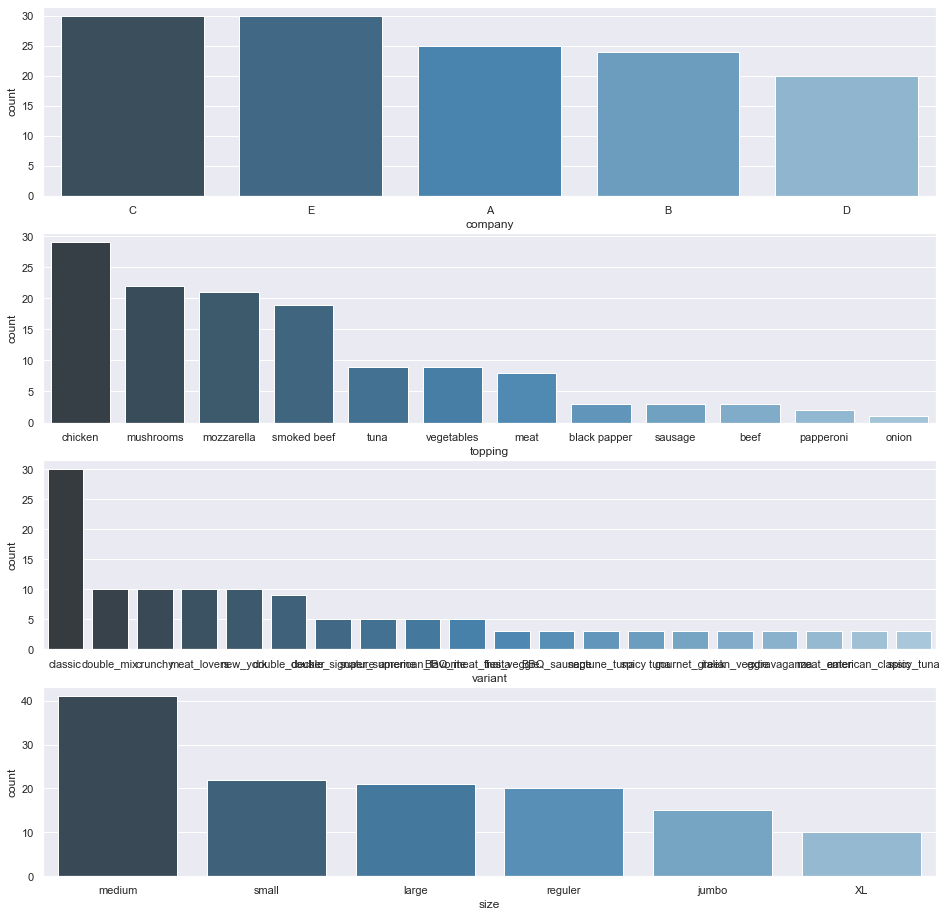

In [538]:
fig, axes = plt.subplots(4, 1, figsize=(16, 16))
# company
sns.countplot(x="company", data=df,palette="Blues_d", ax=axes[0],order = df['company'].value_counts().index)

# topping
sns.countplot(x="topping", data=df,palette="Blues_d",ax=axes[1],order = df['topping'].value_counts().index)

# variant
sns.countplot(x="variant", data=df,palette="Blues_d",ax=axes[2],order = df['variant'].value_counts().index)

# size
sns.countplot(x="size", data=df,palette="Blues_d",ax=axes[3],order = df['size'].value_counts().index)

#### 2.2 Numerical ####

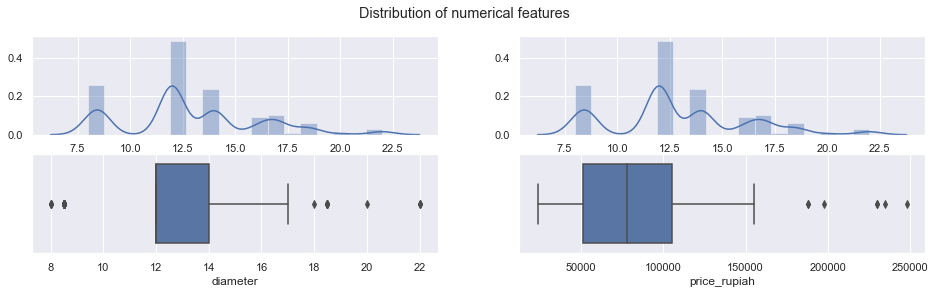

In [539]:
# create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 4))
fig.suptitle('Distribution of numerical features')

# histogram
sns.distplot(df['diameter'],ax=axes[0,0])
sns.distplot(df['diameter'],ax=axes[0,1])

# boxplot
sns.boxplot(ax=axes[1,0], data=df, x='diameter')
sns.boxplot(ax=axes[1,1], data=df, x='price_rupiah')

We see an outlier for **diameter** of **20** onwards, and **price_rupiah** of **200,000** onwards.
<br/>
This will be dealt with in step 3.1

In [540]:
# Display correlation
corr_matrix = df.corr(method ='pearson')
corr_matrix.style.background_gradient(cmap = 'Blues')

,price_rupiah,diameter
price_rupiah,1.000000,0.826977
diameter,0.826977,1.000000


### 3. Clean Data ###

#### 3.1 Remove Outlier ####

In [541]:
df_cleaned = df[
    (df.diameter <20) &
    (df.price_rupiah<200000)
]
f"Records deleted: {len(df)-len(df_cleaned)} rows ({round(((len(df)-len(df_cleaned))/len(df))*100,2)})%"

'Records deleted: 5 rows (3.88)%'

#### 3.2 Create binary values ####

In [542]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no


In [543]:
df_cleaned['extra_sauce'] = df_cleaned.loc[:,"extra_sauce"].replace('yes', 1)
df_cleaned['extra_sauce'] = df_cleaned.loc[:,"extra_sauce"].replace('no', 0)

df_cleaned['extra_cheese'] = df_cleaned.loc[:,"extra_cheese"].replace('yes', 1)
df_cleaned['extra_cheese'] = df_cleaned.loc[:,"extra_cheese"].replace('no', 0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

#### 3.3 Scale Features ####

In [544]:
#  from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # copy dataset
# df_cleaned1 = df_cleaned.copy()

# # define column that we will scale
# col_names = ['price_rupiah','diameter']
# features = df_cleaned1[col_names]

# # fit scaler
# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)

# # put scaled values into df
# df_cleaned1[col_names] = features

In [545]:
df_cleaned1 = df_cleaned.copy()

#### 3.4 Create dummy ####

In [546]:
df_cleaned2 = pd.get_dummies(data=df_cleaned1, columns=['company', 'topping','variant','size'])
df_cleaned2

,price_rupiah,diameter,extra_sauce,extra_cheese,company_A,company_B,company_C,company_D,company_E,topping_beef,...,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_XL,size_jumbo,size_large,size_medium,size_reguler,size_small
2,120000.0,16.0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,155000.0,14.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,140000.0,18.5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,110000.0,16.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,70000.0,8.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,39000.0,8.5,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
125,72000.0,12.0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
126,99000.0,14.0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
127,44000.0,8.5,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### 4. Train Test Split ###

#### 4.1 Split  ####

In [547]:
from sklearn.model_selection import train_test_split
df_cleaned2 = df_cleaned2.copy()
df_train, df_test = train_test_split(df_cleaned2, test_size=0.2, random_state=7)
print(f"{df_train.shape[0]} train and {df_test.shape[0]} test instances")

99 train and 25 test instances


#### 4.2 Declare X,Y  ####

In [548]:
Xtrain = df_train.drop("price_rupiah", axis=1)
ytrain = df_train["price_rupiah"].copy()

Xtest = df_test.drop("price_rupiah", axis=1)
ytest = df_test["price_rupiah"].copy()

### Modeling ###

In [566]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

model1 = regressor.fit(Xtrain, ytrain)

In [567]:
from sklearn import metrics
predict1 = model1.predict(Xtest)
testRsquared1 = metrics.r2_score(ytest, predict1)
print(f'R-Squared : {testRsquared1}')

R-Squared : 0.9785120785444477


In [551]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
model2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
model2.fit(Xtrain, ytrain);

In [552]:
predict2 = model2.predict(Xtest)
testRsquared2 = metrics.r2_score(ytest, predict2)
print(f'R-Squared : {testRsquared2}')

R-Squared : 0.9082980235164206


### Check Result ###

#### Result 1 ####

In [568]:
# Create DataFrame actual VS predicted
result = pd.DataFrame({'actual':predict1,'predicted':ytest})
result.reset_index(drop=True, inplace=True)

# Create new colum for diff (%)
result['diff'] = ((result['predicted']-result['actual'])/result['actual'])*100

In [569]:
# Display actual VS predicted
print(f"XGB Regressor (R-Squared = {round(testRsquared1,3)})")
result.style.bar(subset=['diff'], align='mid', 
                 color=['#d65f5f', '#5fba7d']).format({'actual':'{:.0f}',
                                                       'predicted':'{:.0f}',
                                                       'diff':'{:.2f}%'})

XGB Regressor (R-Squared = 0.979)


,actual,predicted,diff
0,65898,72000,9.26%
1,96549,96000,-0.57%
2,82953,83000,0.06%
3,149023,149000,-0.02%
4,52828,46000,-12.93%
5,51654,46000,-10.95%
6,78308,72000,-8.06%
7,75492,78000,3.32%
8,90422,90000,-0.47%
9,74005,72000,-2.71%


#### Result 2 ####

In [557]:
# Create DataFrame actual VS predicted
result2 = pd.DataFrame({'actual':predict2,'predicted':ytest})
result2.reset_index(drop=True, inplace=True)

# Create new colum for diff (%)
result2['diff'] = ((result2['predicted']-result2['actual'])/result2['actual'])*100

In [558]:
# Display actual VS predicted
print(f"Random Forest Regressor (R-Squared = {round(testRsquared2,3)})")
result2.style.bar(subset=['diff'], align='mid', 
                 color=['#d65f5f', '#5fba7d']).format({'actual':'{:.0f}',
                                                       'predicted':'{:.0f}',
                                                       'diff':'{:.2f}%'})

Random Forest Regressor (R-Squared = 0.908)


,actual,predicted,diff
0,80421,72000,-10.47%
1,100876,96000,-4.83%
2,86888,83000,-4.47%
3,144466,149000,3.14%
4,55688,46000,-17.40%
5,56355,46000,-18.37%
6,85565,72000,-15.85%
7,67468,78000,15.61%
8,88868,90000,1.27%
9,88589,72000,-18.73%


In [565]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, predict2,squared=False)

7992.388648583101

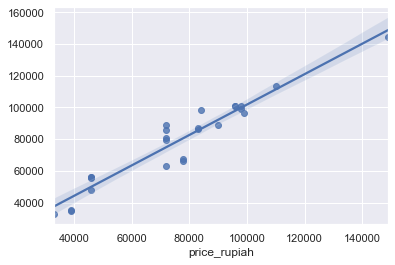

In [585]:
sns.regplot(x = ytest, y = predict2)